Krzysztof Swędzioł 418001 MOWNiT lab 4

Zadanie 1

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


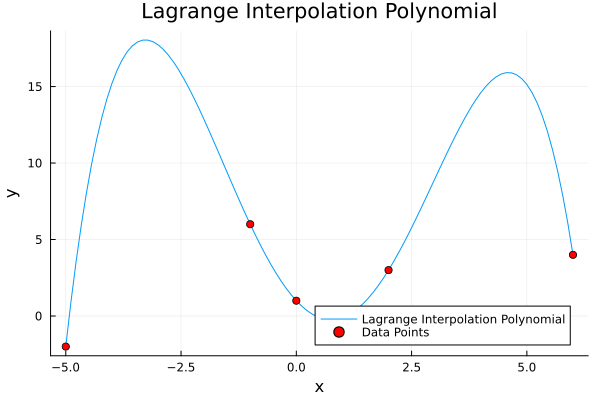

In [42]:
import Pkg
Pkg.add("Plots")
using Plots

function LagrangeInterpolate(xPoints, yPoints, givenPoint)
    pointsAmount = length(xPoints)
    result = 0.0                                                        #Function która przyjmuje zestaw x i y punktów interpolacji oraz x dla którego chcemy wyliczyć wartość 
    for i in 1:pointsAmount
        numerator = 1.0
        denominator = 1.0
        for j in 1:pointsAmount
            if i != j
                numerator *= (givenPoint - xPoints[j])
                denominator *= (xPoints[i] - xPoints[j])
            end
        end
        
        result += (numerator / denominator) * yPoints[i]
    end
    return result
end

#=function generate_random_points(range_start, range_end, num_points)     #funkcja która generuje losowe punkty interpolacji z zadanego przedziału w ilości "num_points"
    return rand(range_start:0.01:range_end, num_points)
end

start_point = 0
end_point = 10
points = 6

xPoints = generate_random_points(start_point, end_point, points)        #tablice zawierają punkty interpolacji
yPoints = generate_random_points(start_point, end_point, points)                                                          
=#

xPoints = [-5.0, -1.0, 0.0, 2.0, 6.0]                                        #tablice zawierają punkty interpolacji
yPoints = [-2.0, 6.0, 1.0, 3.0, 4.0]

x_range = range(minimum(xPoints), maximum(xPoints), length=100)        #dodajemy tutaj dodatkowe punkty dla których wartości liczymy za pmocą naszej funkcji, Użyjemy ich do 
y_range = [LagrangeInterpolate(xPoints, yPoints, x) for x in x_range]   #rysowania wykresu 

plot(x_range, y_range, label="Lagrange Interpolation Polynomial", title="Lagrange Interpolation Polynomial", xlabel="x", ylabel="y")
scatter!(xPoints, yPoints, label="Data Points", color=:red)





Zadanie 2

   Resolving package versions...
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\feXi\.julia\environments\v1.10\Manifest.toml`


Any[-2.0, 2.0, -1.4, 0.4857142857142857, -0.07175324675324675]
-5.0	-2.0	2.0	-1.4	0.4857142857142857	-0.07175324675324675	
-1.0	6.0	-5.0	2.0	-0.30357142857142855	0.0	
0.0	1.0	1.0	-0.125	0.0	0.0	
2.0	3.0	0.25	0.0	0.0	0.0	
6.0	4.0	0.0	0.0	0.0	0.0	
-0.11038961038960782


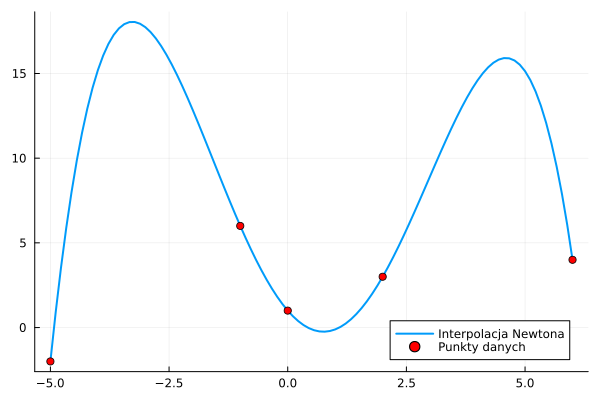

In [44]:
import Pkg
Pkg.add("Plots")
using Plots

function NewtonInterpolation(x_points, y_points)
    n = length(x_points)
    matrixColumnSize = n+1
    matrix = zeros(n, matrixColumnSize)                                 #tworzenie macierzy o n wierszach i n+1 kolumnach
    for i in 1:n
        matrix[i, 1] = x_points[i]                                      #wpisanie znanych wartości punktów interpolacji do macierzy
        matrix[i, 2] = y_points[i]
    end

    curr_amount = n-1
    for column in 3:matrixColumnSize
        for row in 1:curr_amount
            curr_value = (matrix[row + 1, column -1] - matrix[row, column-1])/(matrix[row+column-2, 1] - matrix[row, 1])    #wypełnianie macierzy wyliczanymi wartościami
            matrix[row, column] = curr_value
        end
        curr_amount -= 1
    end

    parameters = []                                                                 #wyciągnięcie wartości parametrów z macierzy do tablicy jednowymiarowej
    for i in 2:matrixColumnSize
        push!(parameters, matrix[1, i])
    end

    formula = createFormula(parameters, x_points)                                   #tworzenie wzoru za pomocą przekazania znanych już parametrów i punktów x 

    return parameters, matrix, formula
end

function addPoint(matrix, x_point, y_point, x_points, y_points)                     #dodanie nowego punktu interpolacji do zdefiniowanej wcześniej macierzy z początkowymi
    rows, cols = size(matrix)                                                       #wartościami
    matrix = vcat(matrix, zeros(1, cols))
    matrix = hcat(matrix, zeros(rows + 1, 1))

    matrix[rows+1, 1] = x_point
    matrix[rows+1, 2] = y_point

    starter = rows

    rows, cols = size(matrix)

    for column in 3:cols
        matrix[starter, column] = (matrix[starter + 1, column -1] - matrix[starter, column-1])/(matrix[rows, 1] - matrix[starter, 1])
        starter -= 1
    end

    parameters = []

    for i in 2:cols
        push!(parameters, matrix[1, i])
    end
    push!(x_points, x_point)
    push!(x_points, x_point)
    return matrix, parameters, x_points, y_points
end

function createFormula(parameters, x_points)                                #funkcja która tworzy matematyczny wzór na wielomian zgodnie ze schematem hornera
    function NewtonPolynomial(x)                                            #do którego wystarczy podstawić x aby uzyskać dla niego wartość 
        result = parameters[1]
        n = length(parameters)
        for i in 2:n
            curr = parameters[i]
            for j in 1:(i-1)
                curr *= (x - x_points[j])
            end
            result += curr
        end
        return result
    end
    return NewtonPolynomial
end


function printMatrix(matrix)                                                #pomocnicza funkcja do wypisania macierzy
    rows, cols = size(matrix)  
    for i in 1:rows
        for j in 1:cols
            print(matrix[i, j], "\t")  
        end
        println()  
    end
end
    
x_points = [-5.0, -1.0, 0.0, 2.0, 6.0]
y_points = [-2.0, 6.0, 1.0, 3.0, 4.0]

parameters, diff_quotients, formula = NewtonInterpolation(x_points, y_points)

println(parameters)        
printMatrix(diff_quotients)                                                                             
println(formula(1.0))

#=
for i in 1:length(x_points)                                                                                               #test czy wartości dla punktów interpolacji się zgadzają
    println(formula(x_points[i]))
end
=#
#=
x_point_to_add = 7.0
y_point_to_add = 5.0
                                                                                                                            #Do testowania dodawania nowych punktów interpolacji
printMatrix(diff_quotients)                                                                                                   #na czas testów zakomentuję
matrix, parameters, x_points, y_points = addPoint(diff_quotients, x_point_to_add, y_point_to_add, x_points, y_points)
formula = createFormula(parameters, x_points)
printMatrix(matrix)
println(parameters)
=#


X_range = range(minimum(xPoints), maximum(xPoints), length=100) 
Y_values = [formula(x) for x in x_range]

plot(X_range, Y_values, label="Interpolacja Newtona", linewidth=2)
scatter!(x_points, y_points, label="Punkty danych", color=:red)

